# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
Cosco = pd.read_csv('/Users/ajiacovic/Documents/dataV2-labs/module-3/Unsupervised-Learning/data/Wholesale customers data.csv')
Cosco.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
Cosco.info()

# Later in my analysis of ourliers and so on, I remeber this method: info
#Here I an already see columns, missing values and types :-)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## what do the columns mean:
Let's remember that this is a wholesale distributor so,
`Channel` : is whether the whosale grocery store (let's call it Cosco) sales to retail of Horeca =channels
`Region`: The region of the customer 
`Fresh`:annual spending on fresh products 
`Milk`:annual spending on milk products, I dn't know what this is (m.u.) 
`Grocery` :annual spending on grocery products 
`Frozen`: an. sp. on frozen products
`Detergents_Paper`: an. sp. on detergents and paper products
`Delicassen`: an. sp on delicatessen products



### TYPES

In [4]:
Cosco.dtypes
#All types are int : normal since thy are amounts
# Region and channel are categorical but they already seem to be converted into numerical values
# One remark: it makes it difficult to understand categorical columns such as region
#or channel without knowing which code belongs to what value

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
columns = Cosco.columns

for column in columns:
    print(f'*** {column} *** :\n{Cosco[column].value_counts()}\n')
    
## From this I see that concerning the categorical data we have:
# 2 channels and 3 Regions

## Numerical data:
#Many unique values (which mak sens as these are annual amounts)

*** Channel *** :
1    298
2    142
Name: Channel, dtype: int64

*** Region *** :
3    316
1     77
2     47
Name: Region, dtype: int64

*** Fresh *** :
9670     2
3        2
8040     2
514      2
18044    2
        ..
8885     1
694      1
7864     1
1725     1
4098     1
Name: Fresh, Length: 433, dtype: int64

*** Milk *** :
1897     2
5139     2
659      2
829      2
944      2
        ..
7845     1
3748     1
13316    1
28326    1
20484    1
Name: Milk, Length: 421, dtype: int64

*** Grocery *** :
1664    2
2405    2
1493    2
1563    2
3600    2
       ..
582     1
2469    1
3779    1
1733    1
3       1
Name: Grocery, Length: 430, dtype: int64

*** Frozen *** :
744     2
779     2
1619    2
364     2
848     2
       ..
660     1
661     1
662     1
666     1
1026    1
Name: Frozen, Length: 426, dtype: int64

*** Detergents_Paper *** :
227      2
311      2
118      2
811      2
788      2
        ..
610      1
2662     1
24171    1
9836     1
5121     1
Name: Detergents_Paper, L

### MISSING DATA

In [6]:
missing_data = Cosco.isnull().sum()
missing_data
#No missing data found houray!

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

### PLOTS

In [45]:
Cosco.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.063112,-0.174732,0.560983,0.712243,-0.232490,0.727828,0.187357
Region,0.063112,1.000000,0.054510,-0.005981,-0.014855,-0.054609,-0.014227,0.003139
Fresh,-0.174732,0.054510,1.000000,-0.131742,-0.185814,0.242308,-0.251546,0.138828
Milk,0.560983,-0.005981,-0.131742,1.000000,0.750461,-0.043446,0.681648,0.379214
Grocery,0.712243,-0.014855,-0.185814,0.750461,1.000000,-0.163608,0.880638,0.253735
Frozen,-0.232490,-0.054609,0.242308,-0.043446,-0.163608,1.000000,-0.203887,0.138383
Detergents_Paper,0.727828,-0.014227,-0.251546,0.681648,0.880638,-0.203887,1.000000,0.166080
Delicassen,0.187357,0.003139,0.138828,0.379214,0.253735,0.138383,0.166080,1.000000


### Checking correlations

In [48]:
#Displaying lower triangle of the correlation matrix
cosco_corr = pd. DataFrame(np.tril(Cosco.corr().values), columns= Cosco.columns, index=Cosco.columns) 
cosco_corr
# I see a couple of highy correlated columns
# but from the matrix is quite difficult to spot the values, so I will plot them below

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Region,0.063112,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Fresh,-0.174732,0.054510,1.000000,0.000000,0.000000,0.000000,0.00000,0.0
Milk,0.560983,-0.005981,-0.131742,1.000000,0.000000,0.000000,0.00000,0.0
Grocery,0.712243,-0.014855,-0.185814,0.750461,1.000000,0.000000,0.00000,0.0
Frozen,-0.232490,-0.054609,0.242308,-0.043446,-0.163608,1.000000,0.00000,0.0
Detergents_Paper,0.727828,-0.014227,-0.251546,0.681648,0.880638,-0.203887,1.00000,0.0
Delicassen,0.187357,0.003139,0.138828,0.379214,0.253735,0.138383,0.16608,1.0


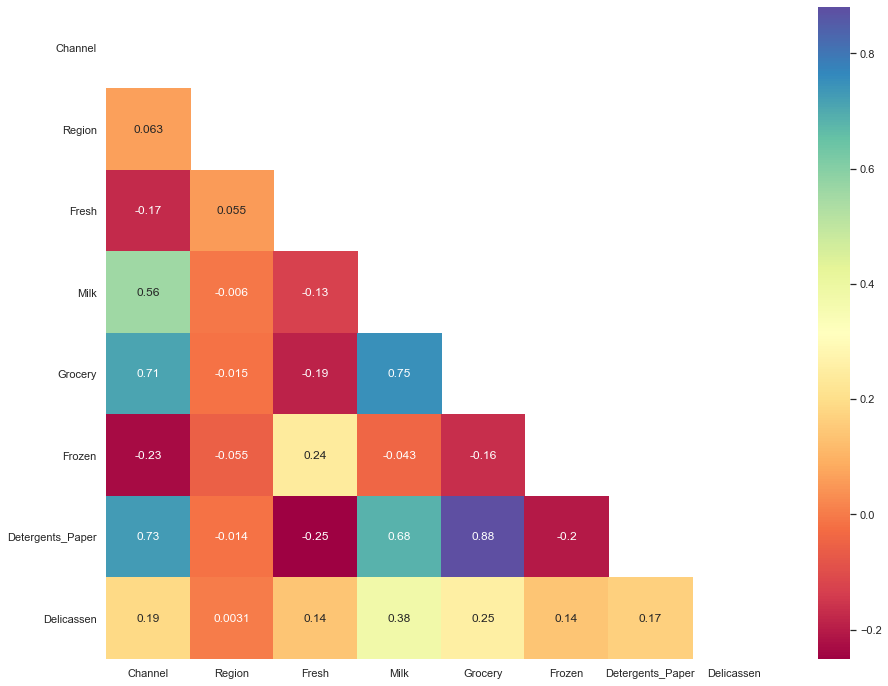

In [49]:
mask = np.triu(np.ones_like(cosco_corr, dtype=bool))

f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(cosco_corr, cmap ='Spectral',mask=mask, annot=True)
plt.show()

In [9]:
#Grocery and Detergent_Paper have some highly correlated values with channel , Milk 
# but specially between each other:

# GROCERY   vs. CHANNEL
#           vs. MILK
#           vs. DETERGENTS_PAPER

# DETERGENTS_PAPER vs. CHANNEL
#                  vs. MILK
#                  vs. GROCERY

# To be checked!

### Checking for Outliers

In [10]:
# Let's look at the numerical data for more info
Cosco.drop(['Channel','Region'], axis=1).describe()

# RECAP:
# The standard deviation is always positive or zero. 
# SMALL standard deviation == concentrated data close to the mean (LITTLE Variation or spread)
# LARGER standard deviation == the data values are more spread out from the mean (MORE Variation)

# The least spread is for Delicatessen 
# Followed by Detergents_Paper and Frozen
# then Milk, Grocery and Fresh

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


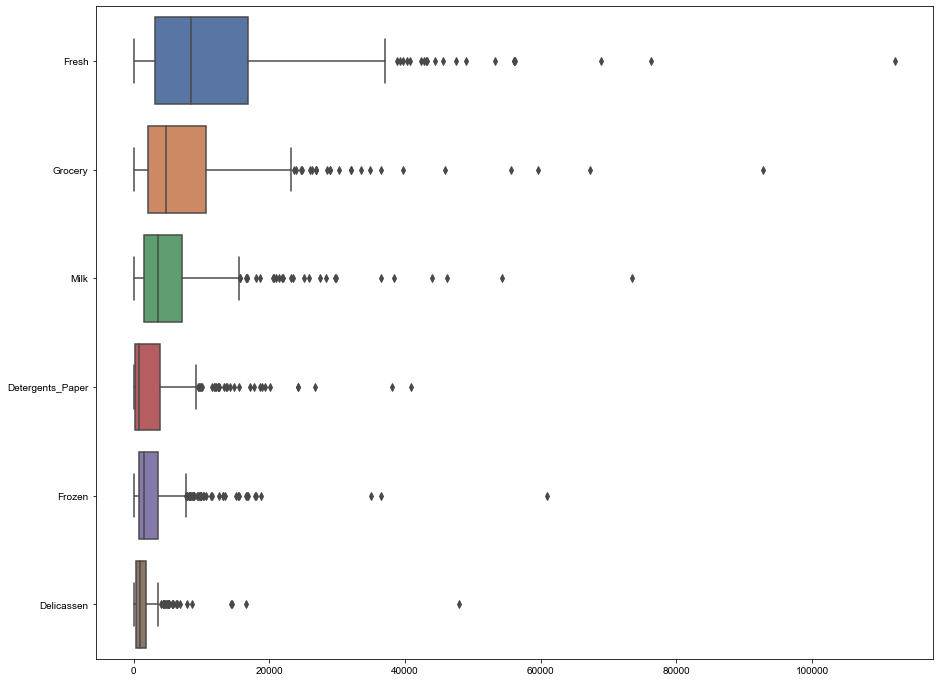

In [11]:
# From the table above:
#There also seem to be some outliers in ALL categories, let's have a closer look

#Let's plot it:
f, ax = plt.subplots(figsize=(15, 12))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=Cosco.drop(['Channel','Region'],axis=1),whis=1.5,orient="h", 
                 order=['Fresh','Grocery','Milk','Detergents_Paper','Frozen','Delicassen']
                )

#From this plot i can very well see that there are indeed many outliers! Specially the max in every category except (Detergent)
#Now, we are talking about
# consumers so this can mean specific clients spending more?

# Should they be kept? or studyied separately?

In [12]:
from numpy import percentile

# If we separate them: Let's say we want to take out all values after the 75%qtle + 1,5 

# calculate interquartile range, cut_off and upper cut_off

# def upper_cut(Series):
#     q25, q75 = percentile(Series, 25), percentile(Series, 75)
#     iqr = q75 - q25
#     cut_off = iqr * 1.5
#     upper = q75 + cut_off
#     return upper

# def outliers(Series):
#     return list(Series.loc[Series > upper_cut(Series)])
    

cols = ['Fresh','Grocery','Milk','Detergents_Paper','Frozen','Delicassen']

## FOR LOOP to identify outliers:

# for col in cols:
#     Series = Cosco[col]
#     upper_cut(Series)
#     print(f'upper of {col} is {upper_cut(Series)}')
#     outliers(Series)
#     print(f'outliers of {col} are {outliers(Series)}\n')

# # TEST
# upper_cut(Cosco['Delicassen']) #I tested and seems that it works

# From this I see all the outliers from category of products.
# I feel that there will be too much info loss, therefore (despite the amount of time I have spent here haha)
# Perhaps is wise only to drop the max values (which seem to be fewer and making quite the difference)

## IDENTIFYING & DROPPING ONLY MAX VALUES

def drop_max(Series):
    print(f' The max values per col in Cols:\n {Series.max()}')
    return Cosco.drop(Series.idxmax(),inplace=True)  


for col in cols:
    Series = Cosco[col]
    drop_max(Series)

Cosco.describe()    


 The max values per col in Cols:
 112151
 The max values per col in Cols:
 92780
 The max values per col in Cols:
 73498
 The max values per col in Cols:
 38102
 The max values per col in Cols:
 60869
 The max values per col in Cols:
 47943


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,1.320276,2.541475,11637.808756,5380.923963,7498.677419,2846.447005,2678.338710,1391.195853
std,0.467121,0.777503,11666.891741,5978.540285,8037.150522,3615.426198,4012.680087,1706.148925
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3098.500000,1515.750000,2146.250000,738.750000,256.250000,405.250000
50%,1.000000,3.000000,8257.500000,3607.500000,4725.000000,1526.000000,811.000000,960.500000
75%,2.000000,3.000000,16724.500000,7091.500000,10391.000000,3519.750000,3879.250000,1783.000000
max,2.000000,3.000000,76237.000000,54259.000000,59598.000000,35009.000000,26701.000000,16523.000000


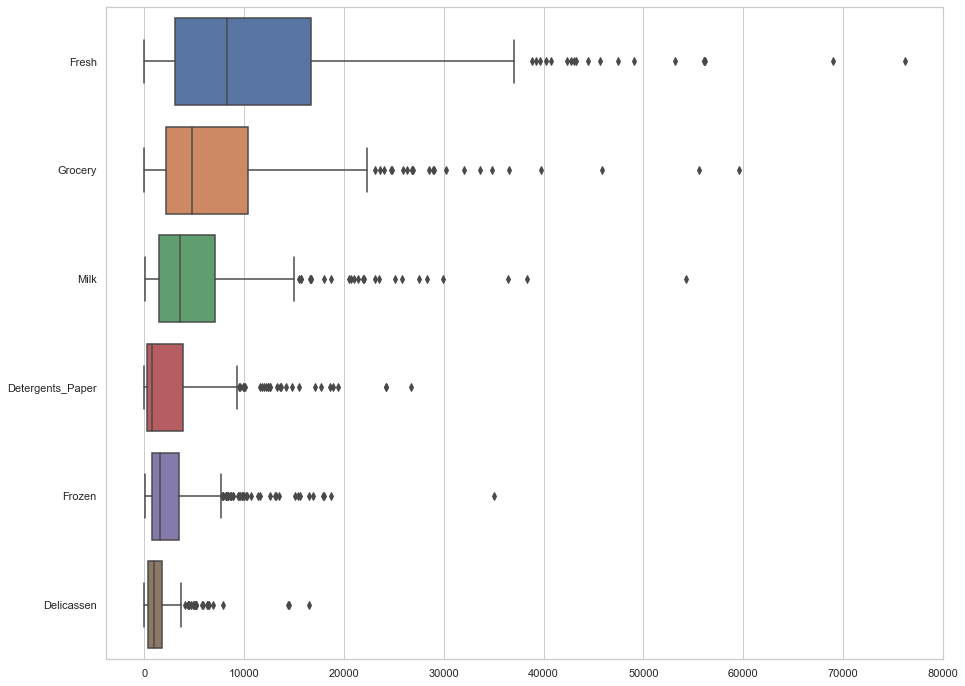

In [13]:
#Let's plot it again:
f, ax = plt.subplots(figsize=(15, 12))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=Cosco.drop(['Channel','Region'],axis=1),whis=1.5,orient="h", 
                 order=['Fresh','Grocery','Milk','Detergents_Paper','Frozen','Delicassen']
                )
#It looks better but there are still quite many outliers to be dropped...

### Distribution

array([[<AxesSubplot:title={'center':'Channel'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Fresh'}>],
       [<AxesSubplot:title={'center':'Milk'}>,
        <AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>],
       [<AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicassen'}>, <AxesSubplot:>]],
      dtype=object)

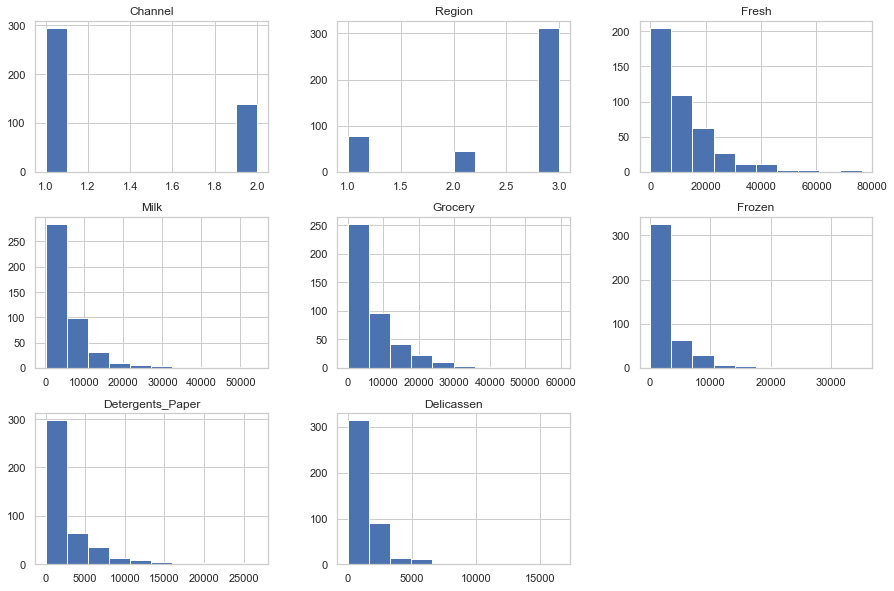

In [14]:
# Your code here:
Cosco.hist(figsize= (15,10))

In [15]:
# Your observations here

# For the categorical data: I see that there is, in both of them, one category that is 
# more important than the others: cat 1 for Channel, Reg 3 for Region
# Distribution for the rest of the numerical data is right-skewed
#also the scales are quite different between the (of course categorical data is in a very small range)


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [40]:
# Your code here

# I wil indeed take out some of the bigger outliers in each product column. but this time manually (since 
#there are different and I want to plot the differences 


to_dropF = Cosco.loc[Cosco['Fresh']>50000].index
to_dropG = Cosco.loc[Cosco['Grocery']>37000].index
to_dropM = Cosco.loc[Cosco['Milk']>30000].index
# to_dropDP = Cosco.loc[Cosco['Detergents_Paper']>20000].index #Went away already
to_dropFr = Cosco.loc[Cosco['Frozen']>30000].index
to_dropD = Cosco.loc[Cosco['Delicassen']>10000].index
Cosco.drop(to_dropF,inplace=True)
Cosco.drop(to_dropG,inplace=True)
Cosco.drop(to_dropM,inplace=True)
# Cosco.drop(to_dropDP,inplace=True)#No need
Cosco.drop(to_dropFr,inplace=True)
Cosco.drop(to_dropD,inplace=True)
#6 values dropped


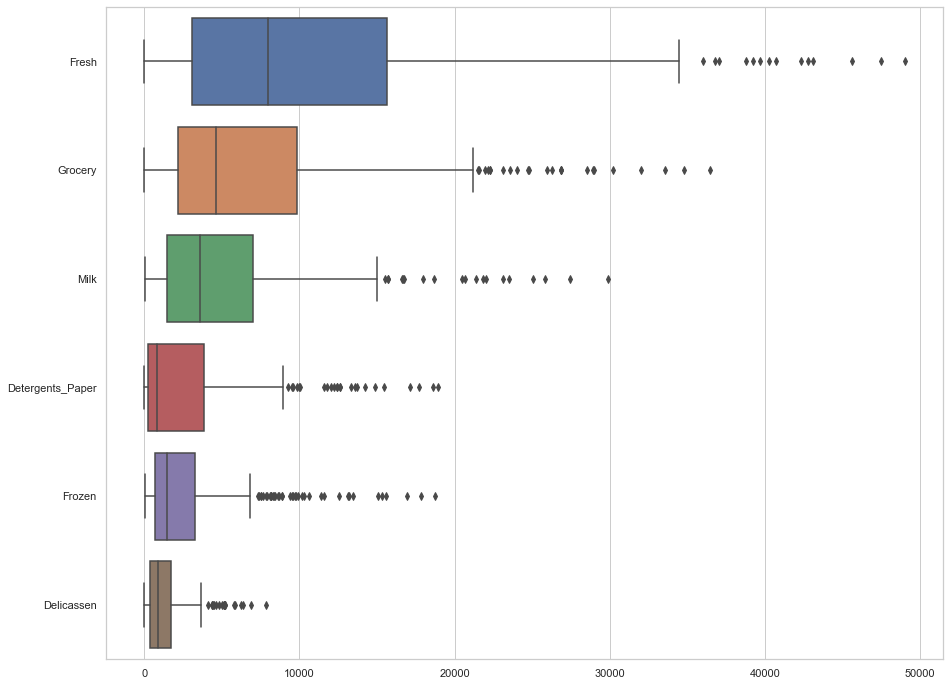

In [41]:
f, ax = plt.subplots(figsize=(15, 12))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=Cosco.drop(['Channel','Region'],axis=1),whis=1.5,orient="h", 
                 order=['Fresh','Grocery','Milk','Detergents_Paper','Frozen','Delicassen']
                )

In [44]:
# Your comment here
Cosco.shape
#I see that by taking the Max and most extreme outliers (far beyond 1.5*IQR), the data 
# looks better and 20 rows were affected
#pct of loss for 20 rows:
pct_loss = 20/440*100
print(f'{round(pct_loss,2)}% of the data was lost')


4.55% of the data was lost


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [19]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [20]:
# Your code here:


Count the values in `labels`.

In [21]:
# Your code here:


# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [22]:
# Your code here


Count the values in `labels_DBSCAN`.

In [23]:
# Your code here


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [24]:
# Your code here:


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [25]:
# Your code here:


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [26]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [27]:
# Your code here:


Which algorithm appears to perform better?

In [28]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [29]:
# Your code here

In [30]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [31]:
# Your code here

In [32]:
# Your comment here